In [1]:
# install_certifi.py
#
# sample script to install or update a set of default Root Certificates
# for the ssl module.  Uses the certificates provided by the certifi package:
#       https://pypi.python.org/pypi/certifi

# import os
# import os.path
# import ssl
# import stat
# import subprocess
# import sys

# STAT_0o775 = ( stat.S_IRUSR | stat.S_IWUSR | stat.S_IXUSR
#              | stat.S_IRGRP | stat.S_IWGRP | stat.S_IXGRP
#              | stat.S_IROTH |                stat.S_IXOTH )


# def main():
#     openssl_dir, openssl_cafile = os.path.split(
#         ssl.get_default_verify_paths().openssl_cafile)

#     print(" -- pip install --upgrade certifi")
#     subprocess.check_call([sys.executable,
#         "-E", "-s", "-m", "pip", "install", "--upgrade", "certifi"])

#     import certifi

    # change working directory to the default SSL directory
#     os.chdir(openssl_dir)
#     relpath_to_certifi_cafile = os.path.relpath(certifi.where())
#     print(" -- removing any existing file or link")
#     try:
#         os.remove(openssl_cafile)
#     except FileNotFoundError:
#         pass
#     print(" -- creating symlink to certifi certificate bundle")
#     os.symlink(relpath_to_certifi_cafile, openssl_cafile)
#     print(" -- setting permissions")
#     os.chmod(openssl_cafile, STAT_0o775)
#     print(" -- update complete")

# if __name__ == '__main__':
#     main()

In [2]:
!ls
!pwd

14 Days                        Prophet_Covid_Analysis.ipynb
180 Days                       README.md
30_Days                        RMSE_30_Days
90 Days                        Untitled.ipynb
COVID-19_Stay_at_home.ipynb    World Data Stay at home order
Cluster.xlsx                   cleaned_covid_19_test_df
Country_Policy.csv             dataset
Covid-19-Test-Processing.ipynb index.html
DaskTest.ipynb                 prophet-master
LICENSE                        stay_home
Policies_Datset.ipynb          test.py
Prophet Demo.ipynb             testfile.py
/Users/yukon/desktop/covid-project


In [3]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [4]:
stay_at_home_df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

In [5]:
stay_at_home_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [6]:
stay_at_home_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [7]:
cleaned_stay_at_home_df = stay_at_home_df[['location','date','total_cases','total_tests','stringency_index','positive_rate','total_deaths']]

In [8]:
cleaned_stay_at_home_df

,location,date,total_cases,total_tests,stringency_index,positive_rate,total_deaths
0,Afghanistan,2019-12-31,0.0,NaN,NaN,NaN,0.0
1,Afghanistan,2020-01-01,0.0,NaN,0.0,NaN,0.0
2,Afghanistan,2020-01-02,0.0,NaN,0.0,NaN,0.0
3,Afghanistan,2020-01-03,0.0,NaN,0.0,NaN,0.0
4,Afghanistan,2020-01-04,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...
41798,International,2020-09-01,696.0,NaN,NaN,NaN,7.0
41799,International,2020-09-02,696.0,NaN,NaN,NaN,7.0
41800,International,2020-09-03,696.0,NaN,NaN,NaN,7.0
41801,International,2020-09-04,696.0,NaN,NaN,NaN,7.0


In [9]:
cleaned_stay_at_home_df['cases_per_tests_ratio'] = cleaned_stay_at_home_df['total_cases']/cleaned_stay_at_home_df['total_tests']

/Users/yukon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
cleaned_stay_at_home_df

,location,date,total_cases,total_tests,stringency_index,positive_rate,total_deaths,cases_per_tests_ratio
0,Afghanistan,2019-12-31,0.0,NaN,NaN,NaN,0.0,NaN
1,Afghanistan,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN
2,Afghanistan,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN
3,Afghanistan,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN
4,Afghanistan,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...
41798,International,2020-09-01,696.0,NaN,NaN,NaN,7.0,NaN
41799,International,2020-09-02,696.0,NaN,NaN,NaN,7.0,NaN
41800,International,2020-09-03,696.0,NaN,NaN,NaN,7.0,NaN
41801,International,2020-09-04,696.0,NaN,NaN,NaN,7.0,NaN


In [11]:
cleaned_stay_at_home_df.dtypes

location                  object
date                      object
total_cases              float64
total_tests              float64
stringency_index         float64
positive_rate            float64
total_deaths             float64
cases_per_tests_ratio    float64
dtype: object

In [12]:
groupby_location_df = cleaned_stay_at_home_df.groupby('location',as_index=False)
separated_location_df = dict(iter(groupby_location_df))

In [13]:
del separated_location_df['Hong Kong']

In [21]:
RMSE_Df = {}
Predicted_Df = {}
def prophet_predicts(location_df,location):
    #m = Prophet(interval_width=0.95, yearly_seasonality = False, weekly_seasonality = True)
    print(location_df.columns)
    prophet_df = location_df[['date','total_cases']]
    prophet_df = prophet_df.rename(columns={'date':'ds','total_cases': 'y'})
    m = Prophet(interval_width = 0.95, yearly_seasonality = False, weekly_seasonality = True)
    m.fit(prophet_df)
    future = m.make_future_dataframe(periods=30)
    forecast = m.predict(future)
    forecast_cv = cross_validation(m, initial = '14 days', horizon = '31 days', period='15 days')
    forecast_pf = performance_metrics(forecast_cv)
    print(forecast_pf)
    m.plot(forecast).savefig(f'./RMSE_30_Days/{location}_forecast.png')
    m.plot_components(forecast).savefig(f'./RMSE_30_Days/{location}_components.png')
    #plot_plotly(m, forecast)
    #plot_components_plotly(m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Index(['location', 'date', 'total_cases', 'total_tests', 'stringency_index',
       'positive_rate', 'total_deaths', 'cases_per_tests_ratio'],
      dtype='object')


INFO:fbprophet:Making 483 forecasts with cutoffs between 2020-01-07 00:00:00 and 2020-09-04 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observatio

          horizon           mse          rmse           mae  mdape  coverage
0 0 days 12:00:00  9.863450e+09  99314.901391  60297.549620    NaN  0.186722
1 1 days 00:00:00  9.937716e+09  99688.093664  60737.811741    NaN  0.185950


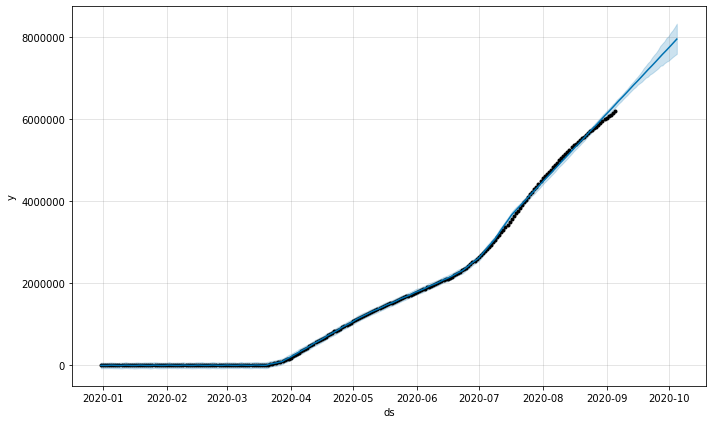

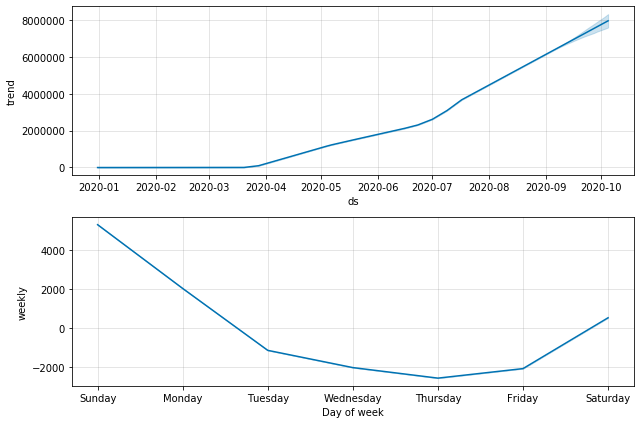

In [32]:
location_model_score = {}
for location in separated_location_df: 
    if(location == 'United States'):
        location_model_score = prophet_predicts(separated_location_df[location], location)

In [15]:
us_covid_df = separated_location_df['United States']
us_covid_df.shape

(250, 8)

Index(['location', 'date', 'total_cases', 'total_tests', 'stringency_index',
       'positive_rate', 'total_deaths', 'cases_per_tests_ratio'],
      dtype='object')


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 14 forecasts with cutoffs between 2020-01-23 00:00:00 and 2020-08-05 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


   horizon           mse           rmse            mae      mape     mdape  \
0   4 days  1.304847e+10  114229.882127   65659.143038  0.275195  0.079288   
1   5 days  1.607356e+10  126781.525207   73722.350704  0.286044  0.085372   
2   6 days  1.937545e+10  139195.733849   81800.222554  0.294322  0.087562   
3   7 days  2.262325e+10  150410.282152   89507.854186  0.299824  0.089701   
4   8 days  2.641726e+10  162533.866491   97551.005149  0.308720  0.094573   
5   9 days  3.115947e+10  176520.452897  106127.045172  0.317865  0.100472   
6  10 days  3.688025e+10  192042.311042  115808.023093  0.325257  0.104304   
7  11 days  4.344301e+10  208429.857948  125937.682405  0.329780  0.107639   
8  12 days  5.038126e+10  224457.694278  136549.277847  0.332804  0.141148   
9  13 days  5.738535e+10  239552.386964  147399.496618  0.337177  0.109319   
10 14 days  6.397950e+10  252941.696193  158034.248897  0.342653  0.109319   
11 15 days  7.129393e+10  267009.230223  169392.026934  0.359230

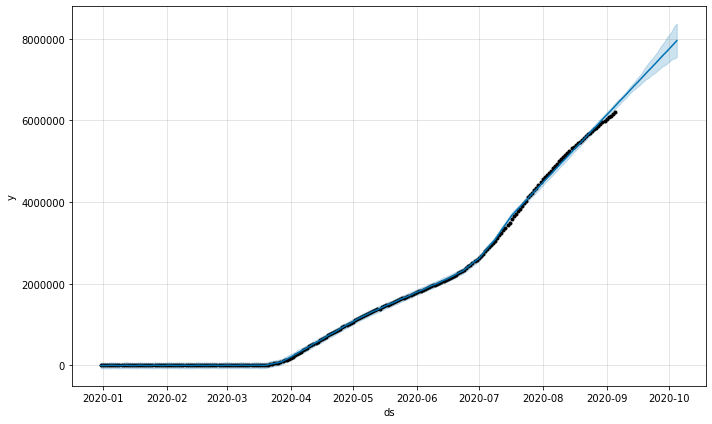

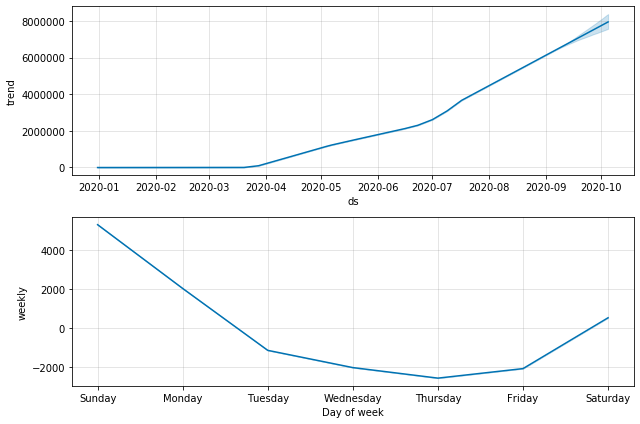

In [22]:
prophet_predicts(us_covid_df, 'United States')

In [18]:
365/2920*250

31.25